In [45]:
# import libray functions

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten,Bidirectional,Activation
from keras.layers.convolutional import MaxPooling1D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
url='https://raw.githubusercontent.com/niloytanvir/heart-failure-data/main/Data/heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(url)

In [47]:
x = data.iloc[:,:-1].values
y = data['DEATH_EVENT']

In [48]:
x = x.reshape(x.shape[0], x.shape[1], 1)

In [49]:
xtrain, a, ytrain, b=train_test_split(x, y, test_size=0.4, random_state=101)

In [50]:
xtest,xpred,ytest,ypred=train_test_split(a, b, test_size=0.15, random_state=101)

In [51]:
# F1 Score custom metrics
from keras import backend as K
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [52]:
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(xtrain.shape[1],1))))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy',f1_score,tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [53]:
bilstm = model.fit(xtrain, ytrain,validation_data=(xtest, ytest), batch_size=32,epochs=100)

Epoch 1/100
6/6 [==============================] - 13s 453ms/step - loss: 0.6717 - accuracy: 0.5680 - f1_score: 0.2160 - precision_3: 0.4062 - recall_3: 0.6224 - val_loss: 0.5761 - val_accuracy: 0.7255 - val_f1_score: 0.0000e+00 - val_precision_3: 0.4062 - val_recall_3: 0.1606
Epoch 2/100
6/6 [==============================] - 0s 26ms/step - loss: 0.6460 - accuracy: 0.6485 - f1_score: 0.0000e+00 - precision_3: 0.4062 - recall_3: 0.1136 - val_loss: 0.5695 - val_accuracy: 0.7255 - val_f1_score: 0.0000e+00 - val_precision_3: 0.4062 - val_recall_3: 0.0763
Epoch 3/100
6/6 [==============================] - 0s 30ms/step - loss: 0.6166 - accuracy: 0.6537 - f1_score: 0.0000e+00 - precision_3: 0.4062 - recall_3: 0.0638 - val_loss: 0.5579 - val_accuracy: 0.7255 - val_f1_score: 0.0000e+00 - val_precision_3: 0.4062 - val_recall_3: 0.0501
Epoch 4/100
6/6 [==============================] - 0s 26ms/step - loss: 0.5860 - accuracy: 0.6688 - f1_score: 0.0000e+00 - precision_3: 0.4062 - recall_3: 0.0446 

In [54]:
prediction=(model.predict(xpred) > 0.5).astype("int32")

In [55]:
prediction

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1]], dtype=int32)

In [56]:
ypred

269    0
178    0
48     1
41     1
172    0
280    0
289    0
298    0
230    1
124    1
177    0
295    0
69     1
56     0
4      1
85     0
90     0
72     1
Name: DEATH_EVENT, dtype: int64

In [57]:
 score = model.evaluate(xpred,  ypred, verbose=2)

print('\nEvaluation:', score)

1/1 - 0s - loss: 0.4458 - accuracy: 0.8333 - f1_score: 0.7692 - precision_3: 0.8007 - recall_3: 0.6794

Evaluation: [0.4458133280277252, 0.8333333134651184, 0.7692307233810425, 0.8007145524024963, 0.6793532967567444]


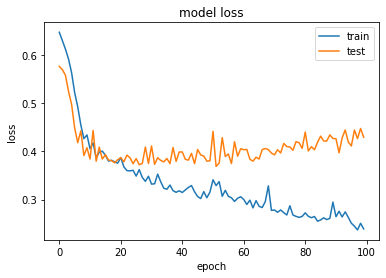

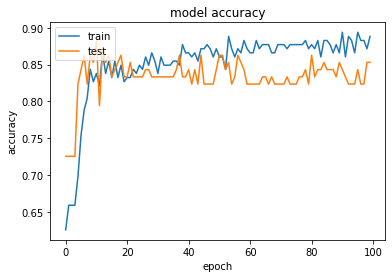

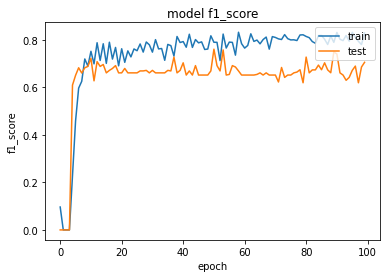

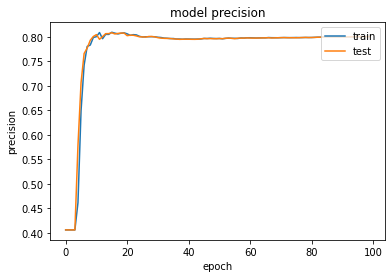

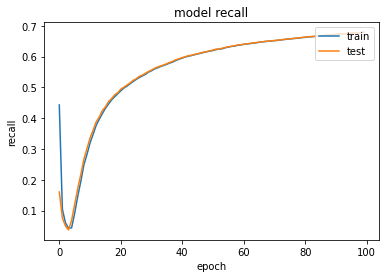

In [59]:
plt.plot(bilstm.history['loss'])
plt.plot(bilstm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()


plt.plot(bilstm.history['accuracy'])
plt.plot(bilstm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(bilstm.history['f1_score'])
plt.plot(bilstm.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()


plt.plot(bilstm.history['precision_3'])
plt.plot(bilstm.history['val_precision_3'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()


plt.plot(bilstm.history['recall_3'])
plt.plot(bilstm.history['val_recall_3'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()